In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
N_dice = 20       #number of dice rolled per throw
N_face = 6        #number of faces of each dice
N_roll = 1000     #number of roll to perform
N_val  = 3        #value to keep track of
N_times= 6        #selected value of times rolling N_val  #because cdf gives P(x<=X) and 1-cdf is P(x>X)

r = np.random     #initialize the random seed
r.seed(42)

In [3]:
def dice_roll(N_dice, N_face, N_roll, N_val):
    
    N_obs = []            #observed events of selected value
    
    for i in range(N_roll):
        
        roll = np.random.randint(low=1, high=N_face+1, size=N_dice)   #fair dice roll=random pick of one face with same probability
        index = np.where(roll == N_val)       #find the dice with the selected value between one roll
        N_obs.append(len(index[0]))

    return N_obs

In [4]:
def id(size, val):            #create an array of size 'size' with every element initialized to 'val'
    return [val]*size
    
def gauss(x, mu, sigma):
    return 1 / (np.sqrt(2*np.pi) * sigma) * np.exp(-0.5 * (x-mu)**2 / sigma**2)

def z_score(val, mu, sigma):   #z-score=how many sigma away from the mean
    return (val-mu)/sigma

 the mean number of 3 is 3.216, and its standard deviation is 1.706
The Z-score for getting 7 the number 3 in a roll with 20 dice is : 2.218 
 a.k.a. the value 7 is 2.218 sigma away from the mean
The p-value of having 7 or less 3 is P(x<7) = 0.987
The 1-CDF above is the p-value of having 7 or more 3, namely P(x>7):0.013
The probability of having 7 or more 3's in a roll with 20 dice is = 1.326%


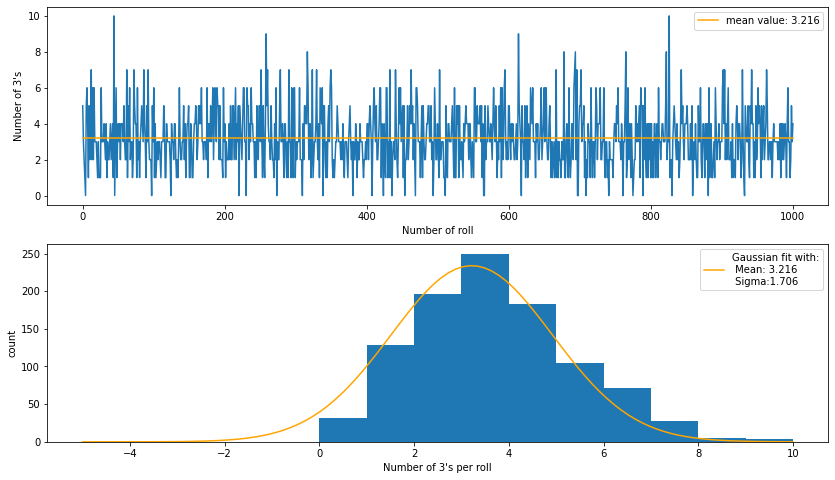

In [5]:
N_obs = dice_roll(N_dice, N_face, N_roll, N_val)

Mean  = np.average(N_obs) #or np.mean
STD   = np.std(N_obs)
xmin  = np.min(N_obs)
xmax  = np.max(N_obs)

print(f' the mean number of {N_val} is {Mean:.3f}, and its standard deviation is {STD:.3f}')

z = z_score(N_times, Mean, STD)
Prob_less = stats.norm.cdf(z)
Prob_more = 1 - stats.norm.cdf(z)
print(f'The Z-score for getting {N_times} the number {N_val} in a roll with {N_dice} dice is : {z:.3f} \n a.k.a. the value {N_times} is {z:.3f} sigma away from the mean')
print(f'The p-value of having {N_times} or less {N_val} is P(x<{N_times}) = {Prob_less:.3f}')
print(f'The 1-CDF above is the p-value of having {N_times} or more {N_val}, namely P(x>{N_times}):{Prob_more:.3f}')
print(f"The probability of having {N_times} or more {N_val}'s in a roll with {N_dice} dice is = {100*Prob_more:.3f}%" )

x_axis = np.linspace(0, N_roll, N_roll)
mean_arr = id(N_roll, Mean)
gauss_x = np.linspace(xmin-5, xmax, 100)

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(14,8))

ax[0].plot(x_axis, N_obs)
ax[0].plot(x_axis, mean_arr, color='orange', label =f'mean value: {Mean:.3f}')
ax[0].set(ylabel = f"Number of {N_val}'s" , xlabel = 'Number of roll')

counts,bins, ignored = ax[1].hist(N_obs, range = (xmin, xmax), align = 'mid')
#ax[1].plot(bins, N_roll/(STD * np.sqrt(2*np.pi)) * np.exp(-0.5 * (bins - Mean)**2 / STD**2))
ax[1].plot(gauss_x, N_roll * gauss(gauss_x, Mean, STD), color='orange', label=f'Gaussian fit with:\n Mean: {Mean:.3f} \n Sigma:{STD:.3f}')
ax[1].set(ylabel = 'count', xlabel = f"Number of {N_val}'s per roll")
ax[0].legend()
ax[1].legend()